In [ ]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from ipywidgets import interact, widgets
from IPython.display import display
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Data Collection
data = pd.read_csv('/content/sentimentdataset.csv')

In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [ ]:
print("Shape:", data.shape)
data.info()

Shape: (732, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
print(data['Sentiment'].unique())

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

In [ ]:
sentiment_counts = data['Sentiment'].value_counts()

In [ ]:
sentiment_counts

 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: Sentiment, Length: 279, dtype: int64

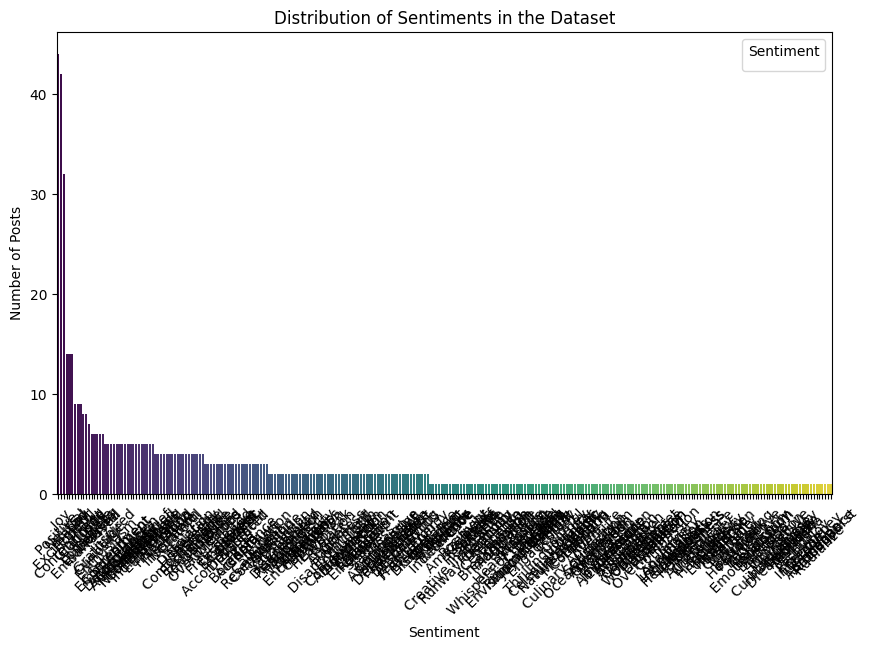

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette="viridis", dodge=False)
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.show()

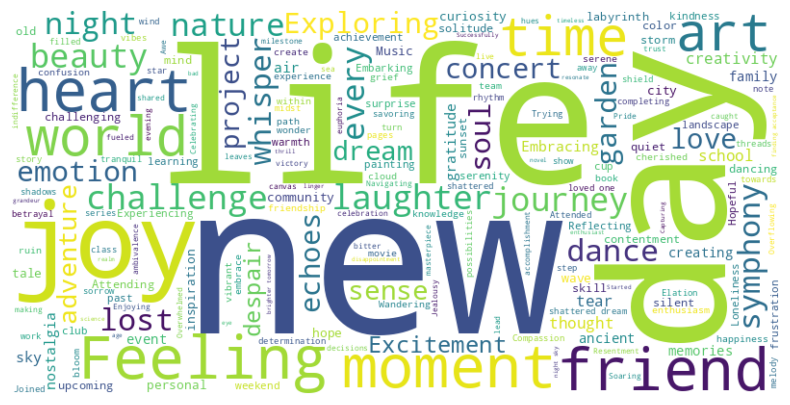

In [ ]:
all_text = ' '.join(data['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
top_sentiments = data['Sentiment'].value_counts().nlargest(10).index

In [ ]:
top_sentiments

Index([' Positive  ', ' Joy ', ' Excitement ', ' Neutral ', ' Contentment ',
       ' Happy ', ' Hopeful ', ' Sad ', ' Gratitude ', ' Curiosity '],
      dtype='object')

In [ ]:
filtered_data = data[data['Sentiment'].isin(top_sentiments)].copy()

In [ ]:
print("Shape:", filtered_data.shape)
filtered_data.info()

Shape: (195, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  195 non-null    int64  
 1   Unnamed: 0    195 non-null    int64  
 2   Text          195 non-null    object 
 3   Sentiment     195 non-null    object 
 4   Timestamp     195 non-null    object 
 5   User          195 non-null    object 
 6   Platform      195 non-null    object 
 7   Hashtags      195 non-null    object 
 8   Retweets      195 non-null    float64
 9   Likes         195 non-null    float64
 10  Country       195 non-null    object 
 11  Year          195 non-null    int64  
 12  Month         195 non-null    int64  
 13  Day           195 non-null    int64  
 14  Hour          195 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 24.4+ KB


In [ ]:
filtered_sentiment_counts = filtered_data['Sentiment'].value_counts()

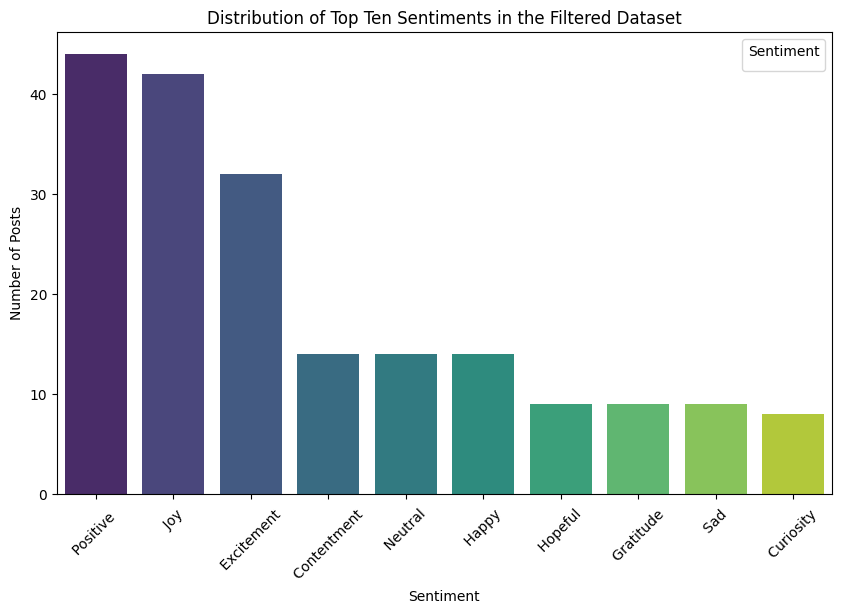

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_sentiment_counts.index, y=filtered_sentiment_counts.values, hue=filtered_sentiment_counts.index, palette="viridis", dodge=False)
plt.title('Distribution of Top Ten Sentiments in the Filtered Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.show()

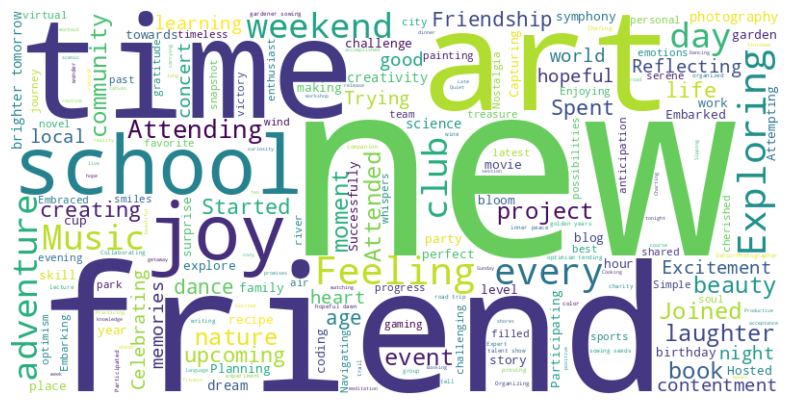

In [ ]:
filtered_all_text = ' '.join(filtered_data['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Data Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

filtered_data['clean_text'] = filtered_data['Text'].apply(preprocess_text)

In [ ]:
# Feature Extraction
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(filtered_data['clean_text'])
y = filtered_data['Sentiment']

In [ ]:
# Model Selection
models = {"Naive Bayes": MultinomialNB(), "Support Vector Machine": SVC(), "Neural Network": MLPClassifier()}

In [ ]:
# Model Training and Evaluation
def train_and_evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Evaluating Naive Bayes:
Classification Report for Naive Bayes:
                precision    recall  f1-score   support

 Contentment        0.00      0.00      0.00         4
   Curiosity        0.00      0.00      0.00         2
  Excitement        0.00      0.00      0.00         7
   Gratitude        0.00      0.00      0.00         4
       Happy        0.00      0.00      0.00         2
     Hopeful        1.00      1.00      1.00         1
         Joy        0.50      0.86      0.63         7
     Neutral        0.00      0.00      0.00         3
   Positive         0.27      1.00      0.42         7
         Sad        0.00      0.00      0.00         2

     accuracy                           0.36        39
    macro avg       0.18      0.29      0.21        39
 weighted avg       0.16      0.36      0.22        39



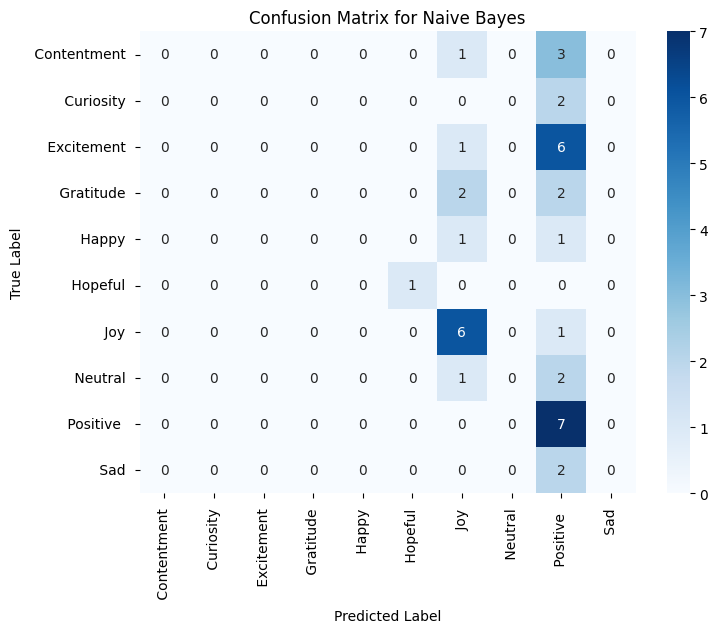


Evaluating Support Vector Machine:
Classification Report for Support Vector Machine:
                precision    recall  f1-score   support

 Contentment        0.00      0.00      0.00         4
   Curiosity        0.00      0.00      0.00         2
  Excitement        0.00      0.00      0.00         7
   Gratitude        0.00      0.00      0.00         4
       Happy        0.00      0.00      0.00         2
     Hopeful        1.00      1.00      1.00         1
         Joy        0.54      1.00      0.70         7
     Neutral        0.00      0.00      0.00         3
   Positive         0.28      1.00      0.44         7
         Sad        0.00      0.00      0.00         2

     accuracy                           0.38        39
    macro avg       0.18      0.30      0.21        39
 weighted avg       0.17      0.38      0.23        39



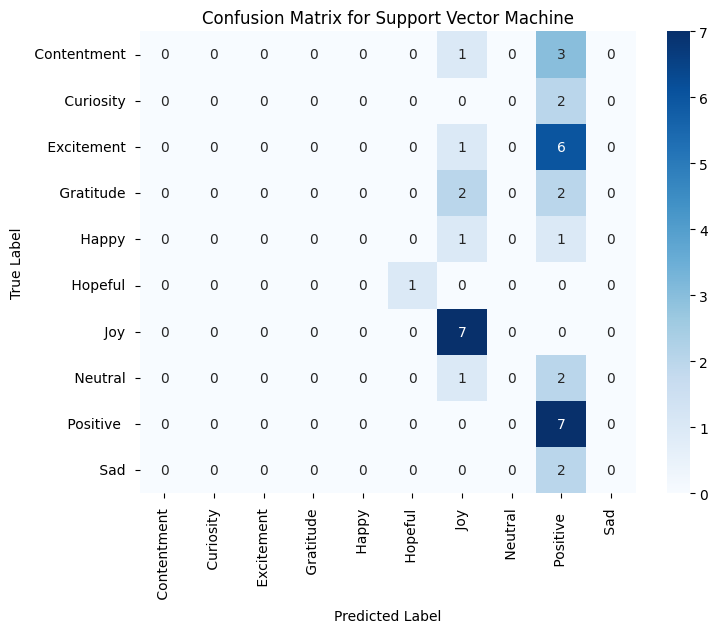


Evaluating Neural Network:
Classification Report for Neural Network:
                precision    recall  f1-score   support

 Contentment        1.00      0.25      0.40         4
   Curiosity        0.00      0.00      0.00         2
  Excitement        0.50      0.43      0.46         7
   Gratitude        1.00      0.25      0.40         4
       Happy        0.00      0.00      0.00         2
     Hopeful        1.00      1.00      1.00         1
         Joy        0.64      1.00      0.78         7
     Neutral        0.00      0.00      0.00         3
   Positive         0.29      0.71      0.42         7
         Sad        0.00      0.00      0.00         2

     accuracy                           0.46        39
    macro avg       0.44      0.36      0.35        39
 weighted avg       0.49      0.46      0.40        39



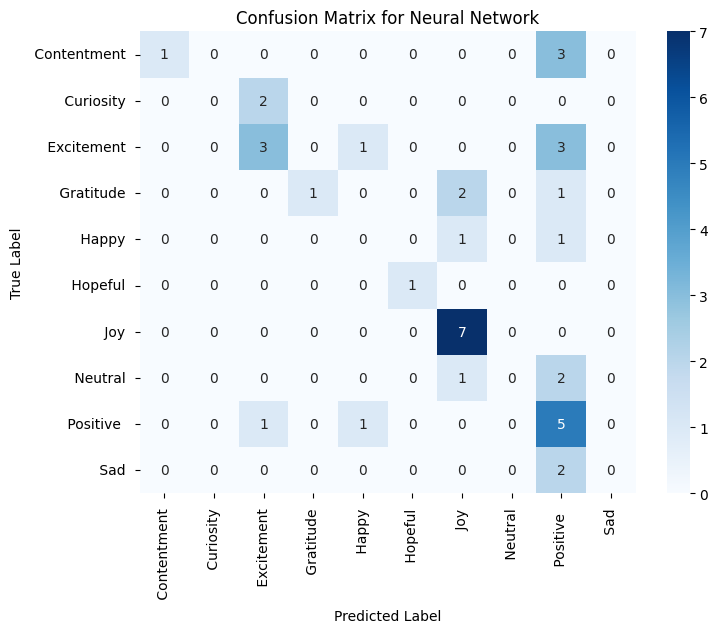

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}:")
    train_and_evaluate_model(model_name, model, X_train, X_test, y_train, y_test)

Evaluating Naive Bayes:
Accuracy of Naive Bayes: 0.36
Evaluating Support Vector Machine:
Accuracy of Support Vector Machine: 0.38
Evaluating Neural Network:
Accuracy of Neural Network: 0.49


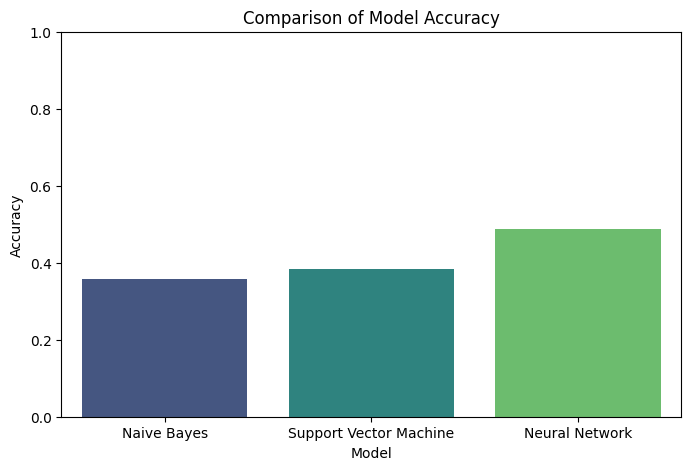

In [ ]:
results = {'Model': [], 'Accuracy': []}

for model_name, model in models.items():
    print(f"Evaluating {model_name}:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    print(f"Accuracy of {model_name}: {accuracy:.2f}")

results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
# Web Interface
def analyze_sentiment(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    sentiment = model.predict(vectorized_text)[0]
    return sentiment

In [ ]:
text_input = widgets.Textarea(value='', placeholder='Enter your text here', description='Text:', disabled=False)

output = widgets.Output()

def on_submit_button_clicked(b):
    output.clear_output()
    with output:
        sentiment = analyze_sentiment(text_input.value)
        print(f"Sentiment: {sentiment}")

submit_button = widgets.Button(description="Submit")
submit_button.on_click(on_submit_button_clicked)

display(text_input)
display(submit_button)
display(output)

Textarea(value='', description='Text:', placeholder='Enter your text here')

Button(description='Submit', style=ButtonStyle())

Output()